In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from utils import get_file_data, get_config, get_file_avg

In [68]:
file_path = '../output/cmp123_crit_numtasks_random_1000/'
files = sorted(os.listdir(file_path))

cfg = get_config('../cfg/cmp123_crit_numtasks_cfg.json')

criticality_prob_list = cfg['critical_prob_list']

only_ls = [0.0] * len(criticality_prob_list)
ds = [0.0] * len(criticality_prob_list)
ours = [0.0] * len(criticality_prob_list)

In [69]:
for file in files :
    if not file.endswith('.txt') :
        continue
    _params = [p.split('=') for p in file[:-4].split('&')]
    params = {k: v for k, v in _params}
    core_ls, core_ds, core_ours = get_file_avg(file_path + file)
    index = criticality_prob_list.index(float(params['critical_prob']))

    only_ls[index] += core_ls
    ds[index] += core_ds
    ours[index] += core_ours

In [70]:
print(only_ls)
print(ds)
print(ours)

[16.11, 15.756666666666666, 15.12, 14.54, 14.143333333333333, 13.84, 13.41, 13.24, 13.096666666666666, 13.04, 12.693333333333333]
[15.066666666666666, 13.62, 12.913333333333334, 12.646666666666667, 12.503333333333334, 12.163333333333334, 11.876666666666667, 12.036666666666667, 11.93, 12.183333333333334, 12.693333333333333]
[15.066666666666666, 14.37, 13.973333333333333, 13.97, 13.86, 13.573333333333334, 13.363333333333333, 13.46, 13.4, 13.32, 12.693333333333333]


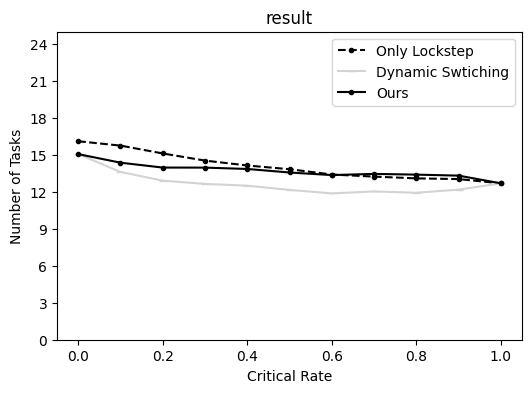

In [71]:
plt.figure(figsize=(6,4))

ax = plt.gca() 

plt.plot(criticality_prob_list, only_ls, label='Only Lockstep', color='black', linestyle='dashed', marker='.')
plt.plot(criticality_prob_list, ds, label='Dynamic Swtiching', color='lightgray', marker='_')
plt.plot(criticality_prob_list, ours, label='Ours', color='black', marker='.')

plt.title('result')
plt.xlabel('Critical Rate')
plt.ylabel('Number of Tasks')
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.ylim(0,25)
plt.legend()
plt.show()